# Numpy


#### A Note about Axis

 - Axis 0 will act on all the ROWS in each COLUMN.
 - Axis 1 will act on all the COLUMNS in each ROW
 
So a mean on axis 0 will be the mean of all the rows in each column and a mean on axis 1 will be a mean of all the columns in each row.

Alternatively - 

 - `axis 0`: by column = columnwise = along the rows
 - `axis 1`: by row = row-wise = along the columns

#### Getting Help : `np.lookfor`

In [2]:
import numpy as np
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

#### Indexing

In [24]:
import numpy as np
a = np.arange(15).reshape(3,-1)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [25]:
a[:2,:1]  #0th and 1st row, 0th column

array([[0],
       [5]])

In [27]:
a[1]  #second row

array([5, 6, 7, 8, 9])

In [28]:
a[1,:] #second row

array([5, 6, 7, 8, 9])

In [30]:
a[:,0] #first column

array([ 0,  5, 10])

#### Fancy Indexing

 - Boolean Masking
 - Integer Masking

In [3]:
# Boolean masking
a = np.random.randint(0,21,15)
a

array([ 1,  7, 20,  8, 11,  6,  0, 10, 18,  8, 12, 19,  7, 17, 12])

In [4]:
(a%3 == 0)

array([False, False, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False,  True], dtype=bool)

In [5]:
mask = (a%3 == 0) #or a[a%3==0]
a[mask]

array([ 6,  0, 18, 12, 12])

In [7]:
a[mask] = -1
a

array([ 1,  7, 20,  8, 11, -1, -1, 10, -1,  8, -1, 19,  7, 17, -1])

In [9]:
# Integer Masking
b = np.random.randint(0,21,16)
mask = [1,3,4,6]
b, b[mask]

(array([ 4,  9, 13, 13, 18,  4,  1, 19,  1,  1, 18,  2, 18, 16,  7,  6]),
 array([ 9, 13, 18,  1]))

In [12]:
mask2d = np.array([[1,3],[4,5]]) 
b[mask2d]

#unlike earlier example, here mask2d is Numpy array rather than 2d list.
#shape of output is same as that of mask2d 

array([[ 9, 13],
       [18,  4]])

#### Mathematical Operations and Comparison

In [21]:
a = np.array([1,2,3])
b = np.array([2,3,4])
print(a*b),       #This is not matrix multiplication
print(a.dot(b))   #This is matrix multiplication

[ 2  6 12]
20


In [22]:
print(a == b)
print(a > b)

[False False False]
[False False False]


In [23]:
np.array_equal(a,b)

False

In [26]:
print(np.logical_or(a,b))
print(np.logical_and(a,b))

[ True  True  True]
[ True  True  True]


In [27]:
#broadcasting? No chance.
a = np.arange(4)
a + np.array([1, 2])


ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [39]:
a = np.triu(np.ones((3, 3)), 1) #take note of np.triu
a

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [40]:
a.T

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

##### Note about Transposition - 

**`a.T`** returns view rather than a copy so operation **`a+=a.T`** is not valid. It may work for small array (because of buffering) but will fail for larger arrays in unpredictable ways.

In [42]:
#didn't work
a+=a.T
a

array([[ 0.,  2.,  2.],
       [ 2.,  0.,  2.],
       [ 2.,  2.,  0.]])

### **`np.allclose`**

**`allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)`**

Returns True if two arrays are element-wise equal within a tolerance.

In [57]:
print(np.allclose([1e10,1e-7], [1.00001e10,1e-8]))

print(np.allclose([1e10,1e-8], [1.00001e10,1e-9]))

False
True


In [61]:
a = [5]
b = [6]
np.allclose(a,b, rtol = 1)

True

In [56]:
help(np.allclose)

Help on function allclose in module numpy.core.numeric:

allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
    Returns True if two arrays are element-wise equal within a tolerance.
    
    The tolerance values are positive, typically very small numbers.  The
    relative difference (`rtol` * abs(`b`)) and the absolute difference
    `atol` are added together to compare against the absolute difference
    between `a` and `b`.
    
    If either array contains one or more NaNs, False is returned.
    Infs are treated as equal if they are in the same place and of the same
    sign in both arrays.
    
    Parameters
    ----------
    a, b : array_like
        Input arrays to compare.
    rtol : float
        The relative tolerance parameter (see Notes).
    atol : float
        The absolute tolerance parameter (see Notes).
    equal_nan : bool
        Whether to compare NaN's as equal.  If True, NaN's in `a` will be
        considered equal to NaN's in `b` in the output array.
   

#### Row-Column Reversal

In [32]:
import numpy as np
a = np.arange(15).reshape(3,-1)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [33]:
a[::-1] #row reversal

array([[10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4]])

In [35]:
a[:,::-1] #column reversal

array([[ 4,  3,  2,  1,  0],
       [ 9,  8,  7,  6,  5],
       [14, 13, 12, 11, 10]])

In [37]:
a[::-1,::-1] #row and column reversal

array([[14, 13, 12, 11, 10],
       [ 9,  8,  7,  6,  5],
       [ 4,  3,  2,  1,  0]])

In [2]:
import numpy as np
l = [1, None, 'a']
b = np.array(l)
print(b)
m = [1, np.nan, 2] #1 and 2 will be converted to float as Nan is a special float value
c = np.array(m)
print(c)

[1 None 'a']
[  1.  nan   2.]


#### `NaN`-safe functions

In [104]:
# difference between np.sum and np.nansum
l1 = [1,2,3]
l2 = [1, np.nan, 3]
l3 = [1, None, 3]

s1 = np.sum(l1) #No issue
s2 = np.sum(l2) # Output will be nan, rather than 4.
#s3 = np.sum(l3) #will throw error as None is not the same type of 1.
s4 = np.nansum(l2) # nan will be ignored and other values will be added
print(s1,s2,s4)

6 nan 4.0


#### Unique Values


In [2]:
import numpy as np
np.unique([1,3,2,3,5,8,7,6,7])

array([1, 2, 3, 5, 6, 7, 8])

#### `astype`

In [17]:
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [18]:
print(a.astype('float')),print(a.astype('object'));

[[ 1.  2.]
 [ 3.  4.]]
[[1 2]
 [3 4]]


#### Converting back to list

In [19]:
a.tolist()

[[1, 2], [3, 4]]

#### Note

Lists passed to Numpy should have same number of elements. Otherwise you'll get 1-D array with `object` dtype:

In [16]:
a = np.array([[1,2,3],[4,5]])
a, a.shape

(array([list([1, 2, 3]), list([4, 5])], dtype=object), (2,))

#### Array Ravel

In [28]:
l = [[[1,2],[3,4]],[[5,6],[7,8]]]
m = np.array(l)
print(m)
print(m.ravel()) #ravel() is used for flattening of array

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[1 2 3 4 5 6 7 8]


#### Array Flattening

**flatten vs ravel:** The difference between ravel and flatten is, the new array created using ravel is actually a reference to the parent array. So, any changes to the new array will affect the parent as well. But is memory efficient since it does not create a copy.

In [32]:
a = m.flatten()
a

array([1, 2, 3, 4, 5, 6, 7, 8])

In [26]:
ar_list = [[1,5],[2,6],[3,7]]
ar = np.array(ar_list)
print(ar),
print(ar[:,0]), # first column
print(ar[:,1])  # second column 

[[1 5]
 [2 6]
 [3 7]]
[1 2 3]
[5 6 7]


In [1]:
import numpy as np
x = np.arange(15).reshape(5,3)
y = np.arange(15).reshape(5,-1) #notice '-1' argument. This makes up for the needed argument value. 
x, y 

(array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]]), array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]]))

#### Splitting

In [12]:
np.split(x,3,1) #3 since we have 3 columns, 1 means axis = 1

[array([[ 0],
        [ 3],
        [ 6],
        [ 9],
        [12]]), array([[ 1],
        [ 4],
        [ 7],
        [10],
        [13]]), array([[ 2],
        [ 5],
        [ 8],
        [11],
        [14]])]

#### Adding New Axis

In [25]:
a = [1,2,3]
b = np.array(a)
c = b[:, np.newaxis] #add new axis. 3x1 array
d = b[np.newaxis, :] #add new axis. 1x3 array
print("b is: \n",b)
print("c is: \n",c)
print("d is: \n",d)

b is: 
 [1 2 3]
c is: 
 [[1]
 [2]
 [3]]
d is: 
 [[1 2 3]]


In [24]:
c.shape, d.shape


((3, 1), (1, 3))

#### Using `None` to create new axis

In [20]:
arr = np.array([1, 2, 3])
arr

array([1, 2, 3])

In [21]:
arr[None]

array([[1, 2, 3]])

#### Creating `array` with `n` elements from an interval 

But you can't always predict the step value.

In [27]:
np.linspace(1,10,12) #1-d array of 12 values from range[1,10]

array([  1.        ,   1.81818182,   2.63636364,   3.45454545,
         4.27272727,   5.09090909,   5.90909091,   6.72727273,
         7.54545455,   8.36363636,   9.18181818,  10.        ])

#### Creating `array` with given `step` value from an interval

But you can't be sure of number of elements. 

In [28]:
np.arange(1,10) #1-d array from range [1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
np.arange(1,10,2) #third argument is 'step'

array([1, 3, 5, 7, 9])

In [31]:
np.arange(1,10).reshape(3,3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### Meshgrid

In [37]:
a = np.array(range(5))
b = np.array(range(5,10))
c = np.meshgrid(a,b)
c

[array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9]])]

#### Random number generation 

In [50]:
np.random.rand(3,2) #random float values from range[0,1) in shape (3,2)

array([[ 0.88498126,  0.23814213],
       [ 0.93397572,  0.1716707 ],
       [ 0.01055526,  0.42006187]])

In [45]:
np.random.random((3,2)) #random values from range[0,1) in shape (3,2). Notice that shape is passed as tuple.

#np.random.random_sample is exactly the same as above

array([[ 0.85436986,  0.0492796 ],
       [ 0.15420237,  0.99444624],
       [ 0.84483877,  0.10184657]])

In [49]:
np.random.randint(1,5,size=(4,3)) #random integer from range[1,5)

array([[2, 2, 3],
       [4, 2, 1],
       [4, 4, 4],
       [4, 4, 2]])

In [6]:
import numpy as np
np.random.randn(2,3) #values from standard normal distribution with mean = 0 and varianvce  =  1

array([[ 0.81245812, -0.32047813,  0.30542903],
       [-1.08882931, -0.40054489,  2.26649748]])

In [57]:
for i in range(10):
    print(np.random.choice(5,2)) 

#first argument for boundary value(exclusive), second argument for number of values to be drawn.
#additional parameter p can also be included for probability distribution.


[3 4]
[1 3]
[3 1]
[0 4]
[4 0]
[2 2]
[2 1]
[4 0]
[4 2]
[0 3]


In [63]:
arr = np.arange(10)
print(arr)
np.random.shuffle(arr)
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[1 5 9 0 4 2 7 8 3 6]


In [69]:
a = np.random.binomial(10,.5)
print(a)
#10 trials, with probability of success of 0.5 of each trial, single test (omitted here). 
#O/p a is the number of successful instances.
b = np.random.binomial(9,.4,10)
#single test consists of 9 trials. 10 such tests are conducted. 
print(b)

4
[4 6 2 2 4 3 5 4 1 2]


[   2.    0.    5.    2.    2.    7.   12.   16.   13.   29.   28.   58.
   68.   97.  150.  206.  264.  319.  426.  579.  702.  807.  870.  891.
  816.  730.  694.  579.  465.  317.  239.  182.  137.   89.   52.   46.
   28.   26.   14.    9.   10.    5.    4.    1.    1.    1.    0.    1.
    0.    1.]
[  1.55743961   1.91746545   2.27749129   2.63751714   2.99754298
   3.35756883   3.71759467   4.07762051   4.43764636   4.7976722
   5.15769804   5.51772389   5.87774973   6.23777557   6.59780142
   6.95782726   7.31785311   7.67787895   8.03790479   8.39793064
   8.75795648   9.11798232   9.47800817   9.83803401  10.19805986
  10.5580857   10.91811154  11.27813739  11.63816323  11.99818907
  12.35821492  12.71824076  13.0782666   13.43829245  13.79831829
  14.15834414  14.51836998  14.87839582  15.23842167  15.59844751
  15.95847335  16.3184992   16.67852504  17.03855088  17.39857673
  17.75860257  18.11862842  18.47865426  18.8386801   19.19870595
  19.55873179]
<a list of 50 Patch 

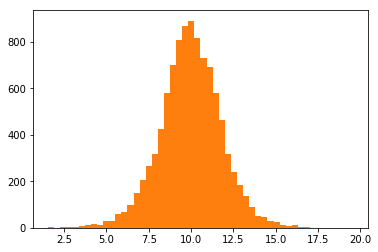

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
s = np.random.logistic(10,1,10000)
plt.hist(s, bins = 50)
count, bins, ignored = plt.hist(s, bins =50)
print(count), print(bins), print(ignored);

In [5]:
a = np.random.permutation(10)
b = np.random.permutation([1,4,3,8,7])
c = np.arange(10).reshape(5,2)
d = np.random.permutation(c) #If `c` is a multi-dimensional array, it is only shuffled along its first index.
print(a)
print('\n')
print(b)
print('\n')
print(c)
print('\n')
print(d)

[7 0 3 5 6 4 9 8 1 2]


[3 4 1 8 7]


[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


[[0 1]
 [8 9]
 [6 7]
 [2 3]
 [4 5]]


In [24]:
b

array([3, 7, 1, 4, 8])

In [25]:
b[:-2]

array([3, 7, 1])

In [26]:
b[-2:]

array([4, 8])

#### Creating a CSV File directly in Notebook and Generating Numpy Array from this File

In [11]:
%%file example.csv
1,2,3,4
5,6,,8
10,11,12,

Overwriting example.csv


In [12]:
ary = np.genfromtxt('example.csv', delimiter=',')
ary

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

#### Counting Zero or Non-Zero Values 

In [14]:
a = np.isnan(ary)
a

array([[False, False, False, False],
       [False, False,  True, False],
       [False, False, False,  True]], dtype=bool)

In [17]:
np.count_nonzero(ary)

12

In [20]:
np.count_nonzero(a)

2

#### Converting nan to Zero

In [21]:
a = np.nan_to_num(ary)
a

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   0.,   8.],
       [ 10.,  11.,  12.,   0.]])